# Topological Data Analysis in Julia
### Demonstrating different TDA Packages
#### R. Avery Harrell

There are many packages one can use to perform TDA in the Julia language. These include Ripserer.jl, TDA.jl, PersistenceDiagrams.jl, Hodge.jl and ComputationalHomology.jl. 

This notebook will demonstrate the capabilities of Ripserer.jl, PersistenceDiagrams.jl, and Hodge.jl.

The data used in this notebook come from an August, 2019 REU supervised by Dr. Markus Pflaum concerning geological properties of meteorites.

### Data
We will use the CSV.jl package to import and process the meteorite data from a csv file.
source: https://csv.juliadata.org/stable/

In [105]:
using CSV
using DataFrames
file=CSV.read("meteorites-table.csv",DataFrame,missingstring="NaN")
## the conjunction of the CSV and DataFrames package allows 
## csv data to be processed into a DataFrame that is 
## similar to that used in the pandas library of Python.

Row,Column1,Name,Class,Subtype,D170,d30Si,d51V,e53Cr,e54Cr,D170_2se,d30Si_2se,d51V_2se,e53Cr_2se,e54Cr_2se
,Int64,String31,String31,String,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,0,10049,Moon,None,missing,-0.28,missing,missing,missing,missing,0.03,missing,missing,missing
2,1,12054,Moon,Ilmenitebasalt1969 ...,missing,-0.29,missing,missing,missing,missing,0.05,missing,missing,missing
3,2,12061,Moon,None,missing,missing,missing,0.22,0.1,missing,missing,missing,0.1,0.06
4,3,14053,Moon,None,missing,-0.27,missing,missing,missing,missing,0.07,missing,missing,missing
5,4,15555,Moon,None,missing,-0.28,missing,missing,missing,missing,0.04,missing,missing,missing
6,5,70017,Moon,None,missing,missing,missing,0.08,0.03,missing,missing,missing,0.12,0.06
7,6,77215,Moon,None,missing,-0.24,missing,missing,missing,missing,0.04,missing,missing,missing
8,7,A881334,Carbonaceous Chondrites,CM2 ...,-4.16,missing,missing,missing,missing,0.07,missing,missing,missing,missing
9,8,A881594,Carbonaceous Chondrites,CM2 ...,-2.49,missing,missing,missing,missing,0.07,missing,missing,missing,missing


In [106]:
dataD17O=file[!,"D170"]

328-element SentinelArrays.SentinelVector{Float64, Float64, Missing, Vector{Float64}}:
   missing
   missing
   missing
   missing
   missing
   missing
   missing
 -4.16
 -2.49
 -2.37
 -2.58
  0.34
  0.33
  ⋮
 -2.45
 -2.02
 -4.84
 -3.81
 -4.3
  0.38
 -2.16
 -4.14
 -0.01
 -0.06
  0.343
  0.86

In [107]:
d170=union(dataD17O)

185-element Vector{Union{Missing, Float64}}:
   missing
 -4.16
 -2.49
 -2.37
 -2.58
  0.34
  0.33
  0.326
  0.53
 -4.47
  0.29
 -4.17
 -2.5
  ⋮
 -2.94
 -1.63
 -2.02
 -4.84
 -3.81
 -4.3
  0.38
 -2.16
 -0.01
 -0.06
  0.343
  0.86

In [108]:
data=file[!,["D170","d30Si","d51V","e53Cr","e54Cr","D170_2se","d30Si_2se","d51V_2se","e53Cr_2se","e54Cr_2se"]]

Row,D170,d30Si,d51V,e53Cr,e54Cr,D170_2se,d30Si_2se,d51V_2se,e53Cr_2se,e54Cr_2se
,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,missing,-0.28,missing,missing,missing,missing,0.03,missing,missing,missing
2,missing,-0.29,missing,missing,missing,missing,0.05,missing,missing,missing
3,missing,missing,missing,0.22,0.1,missing,missing,missing,0.1,0.06
4,missing,-0.27,missing,missing,missing,missing,0.07,missing,missing,missing
5,missing,-0.28,missing,missing,missing,missing,0.04,missing,missing,missing
6,missing,missing,missing,0.08,0.03,missing,missing,missing,0.12,0.06
7,missing,-0.24,missing,missing,missing,missing,0.04,missing,missing,missing
8,-4.16,missing,missing,missing,missing,0.07,missing,missing,missing,missing
9,-2.49,missing,missing,missing,missing,0.07,missing,missing,missing,missing


In [109]:
dataOxCr=data[!,["D170","e54Cr"]]

Row,D170,e54Cr
,Float64?,Float64?
1,missing,missing
2,missing,missing
3,missing,0.1
4,missing,missing
5,missing,missing
6,missing,0.03
7,missing,missing
8,-4.16,missing
9,-2.49,missing


In [110]:
dataOxCr=dropmissing(dataOxCr)

Row,D170,e54Cr
,Float64,Float64
1,-3.52,0.98
2,-2.27,1.13
3,0.3,-0.21
4,-4.59,0.63
5,0.07,-0.01
6,0.12,0.05
7,0.58,-0.55
8,-4.72,0.87
9,-4.48,0.63


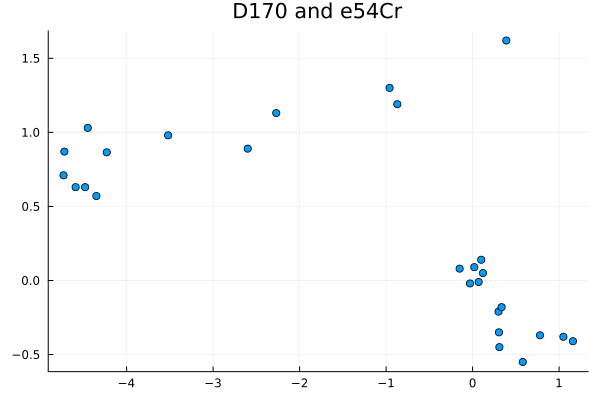

In [111]:
using Plots
oxCR=[t for t in zip(dataOxCr.D170,dataOxCr.e54Cr)]
#source for tuple-ing dataframe columns:
#https://stackoverflow.com/questions/70812822/convenient-way-to-convert-dataframe-to-vector-of-tuple
scatter(oxCR;title="D170 and e54Cr",legend=false)

### Ripserer.jl

In [112]:
using Ripserer

In [113]:
oxCR

27-element Vector{Tuple{Float64, Float64}}:
 (-3.52, 0.98)
 (-2.27, 1.13)
 (0.3, -0.21)
 (-4.59, 0.63)
 (0.07, -0.01)
 (0.12, 0.05)
 (0.58, -0.55)
 (-4.72, 0.87)
 (-4.48, 0.63)
 (0.78, -0.37)
 (0.1, 0.14)
 (1.05, -0.38)
 (-0.15, 0.08)
 ⋮
 (-2.6, 0.89)
 (0.305, -0.35)
 (0.39, 1.62)
 (-4.45, 1.03)
 (0.31, -0.45)
 (0.02, 0.09)
 (-0.03, -0.02)
 (-0.96, 1.3)
 (0.335, -0.18)
 (1.16, -0.41)
 (-0.87, 1.19)
 (-4.23, 0.865)

In [114]:
result_rips=ripserer(oxCR,dim_max=1,modulus=11)

2-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 27-element 0-dimensional PersistenceDiagram
 1-element 1-dimensional PersistenceDiagram

In [115]:
typeof(result_rips)

Vector{PersistenceDiagram} (alias for Array{PersistenceDiagrams.PersistenceDiagram, 1})

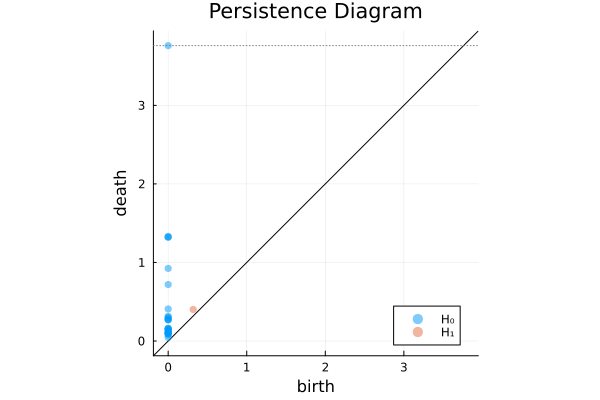

In [116]:
plot(result_rips)

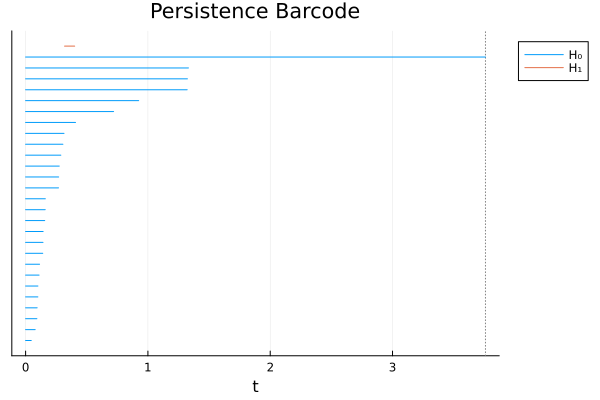

In [117]:
barcode(result_rips)

In [118]:
diagram=result_rips[1]

27-element 0-dimensional PersistenceDiagram:
 [0.0, 0.0461)
 [0.0, 0.0781)
 [0.0, 0.0922)
 [0.0, 0.0943)
 [0.0, 0.1)
 [0.0, 0.1)
 [0.0, 0.11)
 [0.0, 0.114)
 [0.0, 0.14)
 [0.0, 0.142)
 [0.0, 0.143)
 [0.0, 0.156)
 [0.0, 0.16)
 ⋮
 [0.0, 0.27)
 [0.0, 0.275)
 [0.0, 0.288)
 [0.0, 0.305)
 [0.0, 0.314)
 [0.0, 0.408)
 [0.0, 0.719)
 [0.0, 0.924)
 [0.0, 1.32)
 [0.0, 1.32)
 [0.0, 1.33)
 [0.0, ∞)

In [119]:
propertynames(diagram)

(:intervals, :threshold, :dim, :field, :filtration)

In [120]:
diagram.field

Mod{11}

In [121]:
diagram.filtration

Rips{Int64, Float64}(nv=27, sparse=false)

In [122]:
interval=diagram[end]

[0.0, ∞) with:
 birth_simplex: Simplex{0, Float64, Int64}
 death_simplex: Nothing

In [123]:
propertynames(interval)

(:birth, :death, :birth_simplex, :death_simplex)

In [124]:
interval.birth_simplex

0-dimensional Simplex(index=1, birth=0.0):
  +(1,)

In [125]:
interval.death

Inf

In [126]:
simplex=interval.birth_simplex

0-dimensional Simplex(index=1, birth=0.0):
  +(1,)

In [127]:
vertices(simplex)

(1,)

In [128]:
diagram=result_rips[2]

1-element 1-dimensional PersistenceDiagram:
 [0.318, 0.401)

In [129]:
interval=diagram[1]

[0.318, 0.401) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}

In [130]:
interval.birth

0.318472918785882

In [131]:
interval.death

0.40112342240262916

In [132]:
interval.death_simplex

2-dimensional Simplex(index=852, birth=0.40112342240262916):
  +(19, 9, 8)

In [133]:
vertices(interval.death_simplex)

(19, 9, 8)

In [134]:
dim(interval.death_simplex)

2

for a more in-depth usage guide with other examples, see https://mtsch.github.io/Ripserer.jl/dev/generated/basics/

### PersistenceDiagrams.jl
PersistenceDiagrams.jl offers more functionality when you obtain persistence diagrams from a Rips complex.

In [135]:
diagram=result_rips[1]

27-element 0-dimensional PersistenceDiagram:
 [0.0, 0.0461)
 [0.0, 0.0781)
 [0.0, 0.0922)
 [0.0, 0.0943)
 [0.0, 0.1)
 [0.0, 0.1)
 [0.0, 0.11)
 [0.0, 0.114)
 [0.0, 0.14)
 [0.0, 0.142)
 [0.0, 0.143)
 [0.0, 0.156)
 [0.0, 0.16)
 ⋮
 [0.0, 0.27)
 [0.0, 0.275)
 [0.0, 0.288)
 [0.0, 0.305)
 [0.0, 0.314)
 [0.0, 0.408)
 [0.0, 0.719)
 [0.0, 0.924)
 [0.0, 1.32)
 [0.0, 1.32)
 [0.0, 1.33)
 [0.0, ∞)

In [136]:
typeof(diagram)

PersistenceDiagrams.PersistenceDiagram

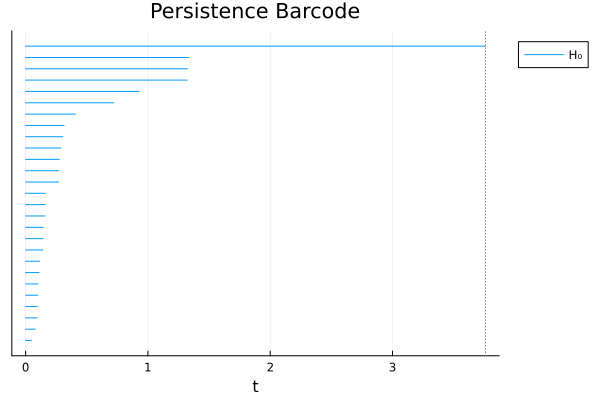

In [137]:
barcode(diagram)

PersistenceDiagrams.jl also offers functionality for computing bottlenecks and Wasserstein matchings and also has vectorization methods which can lead to Betti curves and landscapes.

source:https://mtsch.github.io/PersistenceDiagrams.jl/dev/

### Hodge.jl
Hodge.jl is a package that can compute betti numbers of simplicial complexes, as well as calculating the discrete hodge decomposition of a cochain. 

source: https://docs.juliahub.com/General/Hodge/stable/

In [138]:
using Hodge
#documentation source:
#https://iagoleal.com/Hodge.jl/dev/refs-api/#Hodge.betti

In [139]:
simpcomp=SimplicialComplex([(1,2,3), (1,2,4), [1], [1,5,9,6], (2,6)]);

In [140]:
simpcomp

SimplicialComplex(3, Hodge.SimplexTrees.STRoot(Hodge.SimplexTrees.STNode[Hodge.SimplexTrees.STNode(1, Hodge.SimplexTrees.STNode[Hodge.SimplexTrees.STNode(2, Hodge.SimplexTrees.STNode[Hodge.SimplexTrees.STNode(3, Hodge.SimplexTrees.STNode[], Hodge.SimplexTrees.STNode(#= circular reference @-3 =#)), Hodge.SimplexTrees.STNode(4, Hodge.SimplexTrees.STNode[], Hodge.SimplexTrees.STNode(#= circular reference @-3 =#))], Hodge.SimplexTrees.STNode(#= circular reference @-3 =#)), Hodge.SimplexTrees.STNode(3, Hodge.SimplexTrees.STNode[], Hodge.SimplexTrees.STNode(#= circular reference @-3 =#)), Hodge.SimplexTrees.STNode(4, Hodge.SimplexTrees.STNode[], Hodge.SimplexTrees.STNode(#= circular reference @-3 =#)), Hodge.SimplexTrees.STNode(5, Hodge.SimplexTrees.STNode[Hodge.SimplexTrees.STNode(6, Hodge.SimplexTrees.STNode[Hodge.SimplexTrees.STNode(9, Hodge.SimplexTrees.STNode[], Hodge.SimplexTrees.STNode(#= circular reference @-3 =#))], Hodge.SimplexTrees.STNode(#= circular reference @-3 =#)), Hodge.Sim

In [141]:
simplices(simpcomp)

27-element Vector{Vector{Int64}}:
 []
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [9]
 [1, 2]
 [1, 3]
 [1, 4]
 [1, 5]
 [1, 6]
 ⋮
 [2, 4]
 [2, 6]
 [5, 6]
 [5, 9]
 [6, 9]
 [1, 2, 3]
 [1, 2, 4]
 [1, 5, 6]
 [1, 5, 9]
 [1, 6, 9]
 [5, 6, 9]
 [1, 5, 6, 9]

In [142]:
euler_characteristic(simpcomp)

0

In [143]:
betti(simpcomp)

4-element Vector{Int64}:
 1
 1
 0
 0

In [144]:
circle=SimplicialComplex([(1,2),(1,3),(2,3)]);
#circle=SimplicialComplex([(1,2,3,4)])
#no way to remove 3-dim simplex (1,2,3,4) after creation, be careful.

In [145]:
simplices(circle)

7-element Vector{Vector{Int64}}:
 []
 [1]
 [2]
 [3]
 [1, 2]
 [1, 3]
 [2, 3]

In [146]:
euler_characteristic(circle)

0

In [147]:
betti(circle)

2-element Vector{Int64}:
 1
 1

In [148]:
sphere=SimplicialComplex([(1,2,3),(1,2,4),(1,3,4),(2,3,4)]);

In [149]:
simplices(sphere)

15-element Vector{Vector{Int64}}:
 []
 [1]
 [2]
 [3]
 [4]
 [1, 2]
 [1, 3]
 [1, 4]
 [2, 3]
 [2, 4]
 [3, 4]
 [1, 2, 3]
 [1, 2, 4]
 [1, 3, 4]
 [2, 3, 4]

In [150]:
euler_characteristic(sphere)

2

In [151]:
betti(sphere)

3-element Vector{Int64}:
 1
 0
 1

In [152]:
rpp=SimplicialComplex([
(0,3,5),(0,1,5),(1,5,6),(1,2,6),(2,6,4),(2,0,4),
(3,4,7),(3,5,7),(5,7,8),(5,6,8),(6,8,3),(6,4,3),
(0,4,2),(4,2,7),(7,2,1),(7,8,1),(8,1,0),(8,3,0)
]);

In [153]:
simplices(rpp)

53-element Vector{Vector{Int64}}:
 []
 [0]
 [3]
 [5]
 [1]
 [6]
 [2]
 [4]
 [7]
 [8]
 [0, 3]
 [0, 5]
 [0, 1]
 ⋮
 [3, 5, 7]
 [3, 4, 7]
 [3, 4, 6]
 [3, 6, 8]
 [5, 6, 8]
 [5, 7, 8]
 [1, 5, 6]
 [1, 2, 6]
 [1, 2, 7]
 [1, 7, 8]
 [2, 4, 6]
 [2, 4, 7]

In [154]:
euler_characteristic(rpp)

0

In [155]:
betti(rpp)

3-element Vector{Int64}:
 1
 1
 0

In [157]:
simplices(rpp,2)

17-element Vector{Vector{Int64}}:
 [0, 3, 5]
 [0, 3, 8]
 [0, 1, 5]
 [0, 1, 8]
 [0, 2, 4]
 [3, 5, 7]
 [3, 4, 7]
 [3, 4, 6]
 [3, 6, 8]
 [5, 6, 8]
 [5, 7, 8]
 [1, 5, 6]
 [1, 2, 6]
 [1, 2, 7]
 [1, 7, 8]
 [2, 4, 6]
 [2, 4, 7]